# Загрузка данных
Для этого урока мы используем данные из каталога DATA. После того, как вы загрузили файл Data.zip в свой домашний каталог, вы можете разархивировать файл, например, 7Zip (в Windows).
Папка данных включает в себя Shapefile под названием DAMSELFISH_distribution.shp (и связанные с ним файлы).

# Чтение файла Shapefile
Пространственные данные можно легко читать с помощью геоданных, используя -функцию gpd.from_file() :

In [2]:
import geopandas as gpd

In [6]:
fp = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\DAMSELFISH_distributions.shp"

In [7]:
data = gpd.read_file(fp)

In [6]:
type (data)

geopandas.geodataframe.GeoDataFrame

Okey, поэтому из вышеизложенного мы видим, что наш data-variable является GeoDataFrame . GeoDataFrame расширяет функциональные возможности pandas.DataFrame таким образом, что можно использовать и обрабатывать пространственные данные в пандах (отсюда и названия геоданных). GeoDataFrame имеет некоторые специальные функции и функции, которые полезны в ГИС.

Давайте посмотрим на наши данные и напечатаем первые 5 строк, используя
head() -функция печатает первые 5 строк по умолчанию

In [15]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


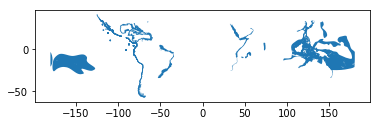

In [8]:
data.plot();

In [11]:
out = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\DAMSELFISH_distributions_out.shp"

In [12]:
selection = data [0:50]
selection.to_file (out)

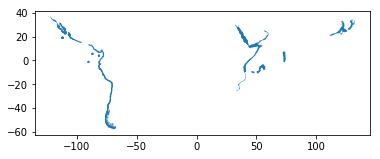

In [16]:
y = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\DAMSELFISH_distributions_out.shp"
y = gpd.read_file(y)

y.plot();

# Геометрия в геопандах
Geopandas использует геометрические объекты Shapely. Геометрия хранится в столбце с именем geometry, который является именем столбца по умолчанию для хранения геометрической информации в геоданном.

Давайте напечатаем первые 5 строк геометрии столбца:

In [17]:
data ['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

In [18]:
selection = data [0:5]

In [24]:
for index, row in selection.iterrows():
    poly_area = row ['geometry'].area
    print ("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


In [26]:
data ['area'] = data.area
data ['area'].head()

0    19.396254
1     6.145902
2     2.697207
3    87.460621
4     0.000918
Name: area, dtype: float64

Okey, поэтому мы можем видеть, что область нашего первого многоугольника, по-видимому, составляет 19.39 и 6.14 для второго многоугольника. Они соответствуют тем, которые мы видели на предыдущем шаге при повторении строк, следовательно, все работает так, как должно. Давайте проверим, что такое min и max этих областей, используя знакомые функции из наших предыдущих сокращений Pandas.

In [28]:
max_area = data ['area'].max()

mean_area = data ['area'].mean()

print ("Max area: %s\nMean area: %s" % (round (max_area, 2), round (mean_area, 2)))

Max area: 1493.2
Mean area: 19.96


# Создание геометрий в GeoDataFrame
Поскольку геоданные используют преимущества геометрических объектов Shapely, можно создать Shapefile с нуля, передав геометрические объекты Shapely в GeoDataFrame. Это полезно, поскольку упрощает преобразование, например, текстового файла, который содержит координаты в Shapefile.

Давайте создадим пустую GeoDataFrame.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

newdata = gpd.GeoDataFrame()

In [2]:
print (newdata)

Empty GeoDataFrame
Columns: []
Index: []


GeoDataFrame пуст, поскольку мы не помещаем какие-либо данные внутри.

Давайте создадим новый столбец, geometry который будет содержать наши объекты Shapely:

In [3]:
newdata ['geometry'] = None

print (newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Теперь у нас есть геометрия в нашем GeoDataFrame, но у нас пока нет данных.

Давайте создадим Shapely Polygon, воссоздающий квадрат сената Хельсинки, который мы можем вставить в наш GeoDataFrame:

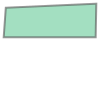

In [4]:
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon (coordinates)
poly

Okey, так что теперь у нас есть подходящий объект Polygon.

Вставим многоугольник в наш столбец «geometry» в нашем GeoDataFrame:

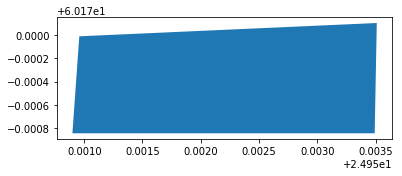

In [9]:
newdata.loc [0, 'geometry'] = poly

newdata.plot();

Теперь у нас есть GeoDataFrame с Polygon, который мы можем экспортировать в Shapefile.

Давайте добавим еще один столбец в наш GeoDataFrame Locationс текстом Senaatintori .

In [10]:
newdata.loc [0, 'Location'] = 'Senaatintori'
newdata

,geometry,Location
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16...",Senaatintori


Перед экспортом данных полезно определить координатную систему координат (проекции) для GeoDataFrame.

GeoDataFrame имеет свойство, называемое .crs, которое (подробнее о проецировании в следующем учебнике) показывает систему координат данных, которая пуста (None) в нашем случае, поскольку мы создаем данные с нуля:

In [11]:
print (newdata.crs)

None


Давайте добавим crs для нашего GeoDataFrame. Модуль Python, называемый fiona, имеет приятную функцию, предназначенную from_epsg()для прохождения системы координат для GeoDataFrame. Затем мы будем использовать это и определить проекцию на WGS84 (код epsg: 4326):

In [12]:
from fiona.crs import from_epsg
newdata.crs = from_epsg (4326)
newdata.crs

{'init': 'epsg:4326', 'no_defs': True}

Наконец, мы можем экспортировать данные, используя GeoDataFrames -функцию .to_file() . Функция работает так же, как numpy или pandas, но здесь нам нужно только предоставить выходной путь для Shapefile. Легко, не так ли !:

In [13]:
outfp = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\Senaatintori.shp"

newdata.to_file(outfp)

Теперь мы успешно создали Shapefile с нуля, используя только Python-программирование. Аналогичный подход может использоваться, например, для чтения координат из текстового файла (например, точек) и автоматического создания Shapefiles.

# Практический пример: сохранение нескольких Shapefiles
Одной действительно полезной функцией, которая может быть использована в Pandas / Geopandas, является .groupby () . Мы видели и использовали эту функцию уже в уроке 5 курса Geo-Python . Групповая функция полезна для группировки данных на основе значений в выбранных столбцах.

In [17]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


In [18]:
grouped = data.groupby ('BINOMIAL')
grouped

groupby-функция дает нам объект, DataFrameGroupBy который похож на список ключей и значений (в словаре), которые мы можем перебирать.

In [24]:
for key, values in grouped:
    individual_fish = values
    
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
27,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.6300326400001 33.04248618400004,..."
28,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219482400007 29.97488975500005,..."
29,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.9052090560001 34.02498196400006,..."
30,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((56.32233070000007 -3.707270205999976...
31,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((40.64476131800006 -10.85502363999996...
32,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((48.11258402900006 -9.335103113999935...
33,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75403543100003 -9.21679305899994,..."


Отсюда видно, что переменная individual_fish теперь содержит все строки, принадлежащие названной рыбе . Обратите внимание, что номера индексов относятся к номерам строк в исходных данных -GeoDataFrame.Teixeirichthys jordani

Давайте проверим тип данных сгруппированного объекта и что keyсодержит переменная

In [26]:
type (individual_fish)

geopandas.geodataframe.GeoDataFrame

In [27]:
print (key)

Teixeirichthys jordani


Как видно из приведенного выше примера, каждый набор данных теперь сгруппирован в отдельные GeoDataFrames, которые мы можем экспортировать в Shapefiles, используя переменную key для создания имен выходных файлов. Здесь мы используем специальный метод форматирования строк для создания выходного имени файла (далее здесь ). Давайте теперь экспортируем эти виды в отдельные Shapefiles.% operator

In [29]:
import os

In [38]:
outFolder = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA"
resultFolder = os.path.join (outFolder, 'Results')
if not os.path.exists (resultFolder):
    os.makedirs (resultFolder)
    
for key, values in grouped:
    outName = "%s.shp" % key.replace (" ","_")
    
print ("Processing: %s" % key)

outpath = os.path.join (resultFolder, outName)

values.to_file (outpath)

Processing: Teixeirichthys jordani


# Карта прогнозов
Координатные системы отсчета (CRS) важны, поскольку геометрические фигуры в GeoDataFrame представляют собой просто набор координат в произвольном пространстве. CRS сообщает Python, как эти координаты связаны с местами на Земле. Проекция карты (или проецированная система координат) представляет собой систематическое преобразование широт и долгот в ровную поверхность, где единицы довольно часто представлены как метры (вместо десятичных степеней).

Поскольку картографические проекции gis-слоев довольно часто определяются по-разному (т. Е. Они не совпадают), общепринятая процедура переопределяет проекции карт одинаковыми в обоих слоях. Важно, чтобы слои имели одинаковую проекцию, что позволяло анализировать пространственные отношения между слоями, например, проводить пространственный запрос Point in Polygon.

К счастью, определение и изменение прогнозов легко в Geopandas. В этом уроке мы увидим, как получить информацию о системе координат из данных и как ее изменить. Мы перепроектируем файл данных из WGS84 (координаты lat, lon) в проекцию Ламберта на азимутальную равную площадь, которая является рекомендуемым прогнозом для Европы Европейской комиссией.

Загрузить данные
Для этого урока мы будем использовать Shapefile, представляющий Европу.

Система координат (CRS)
GeoDataFrame, который считывается из Shapefile, содержит всегда (ну не всегда, но должен) информацию о системе координат, в которой проецируются данные.

Начнем с чтения данных из Europe_borders.shp файла.

In [40]:
import geopandas as gpd

fp = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\Europe_borders\Europe_borders.shp"
data = gpd.read_file(fp)

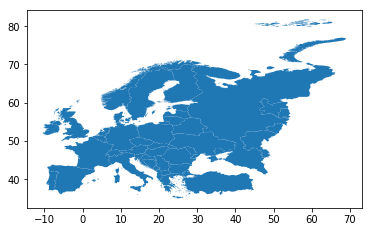

In [43]:
data.plot();

In [44]:
data.crs

{'init': 'epsg:4326'}

Okey, поэтому из этой зависимости мы можем видеть, что данные - это что-то, называемое epsg: 4326 . Номер EPSG ( «European Petroleum Survey Group» ) представляет собой код, который рассказывает о системе координат набора данных. « Набор данных геодезических параметров EPSG представляет собой набор определений систем координат и преобразований координат, которые могут быть глобальными, региональными, национальными или локальными в применении». EPSG-номер 4326, который мы имеем здесь, относится к системе координат WGS84 (т.е. координаты находятся в десятичных градусах (lat, lon)).

Вы можете найти много информации о различных доступных системах координат:

www.spatialreference.org/n
www.proj4.org/n
www.mapref.org/n
Давайте также проверим значения в нашем geometryстолбце.

In [47]:
data.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.457777976989746 54.56236267089844,..."
1,Europe/Berlin,"POLYGON ((8.71992015838623 47.69664382934571, ..."
2,Europe/Berlin,"POLYGON ((6.733166694641113 53.5740852355957, ..."
3,Europe/Berlin,"POLYGON ((6.858222007751465 53.59411239624024,..."
4,Europe/Berlin,"POLYGON ((6.89894437789917 53.6256103515625, 6..."


In [48]:
data.geometry.head()

0    POLYGON ((8.457777976989746 54.56236267089844,...
1    POLYGON ((8.71992015838623 47.69664382934571, ...
2    POLYGON ((6.733166694641113 53.5740852355957, ...
3    POLYGON ((6.858222007751465 53.59411239624024,...
4    POLYGON ((6.89894437789917 53.6256103515625, 6...
Name: geometry, dtype: object

Okey, поэтому значения координат многоугольников действительно выглядят как значения lat-lon.

Давайте преобразуем эти геометрии в проекцию Ламберта на азимутальную равную площадь ( EPSG: 3035 ). Изменение проекции очень легко сделать в Geopandas с .to_crs()-функцией. В качестве входных данных для функции вы должны определить столбец, содержащий геометрии, то есть geometry в этом случае, и epgsзначение проекции, которое вы хотите использовать.

In [49]:
data_proj = data.copy()

data_proj = data_proj.to_crs (epsg = 3035)

In [51]:
data_proj.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((4221214.558088431 3496203.404338956,..."
1,Europe/Berlin,"POLYGON ((4224860.478308966 2732279.319617757,..."
2,Europe/Berlin,"POLYGON ((4104652.175545862 3390034.953002084,..."
3,Europe/Berlin,"POLYGON ((4113025.664284974 3391895.755505159,..."
4,Europe/Berlin,"POLYGON ((4115871.227627173 3395282.099288368,..."


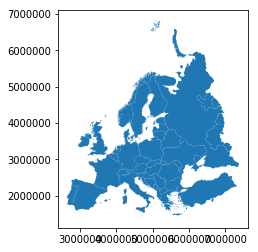

In [52]:
data_proj.plot()

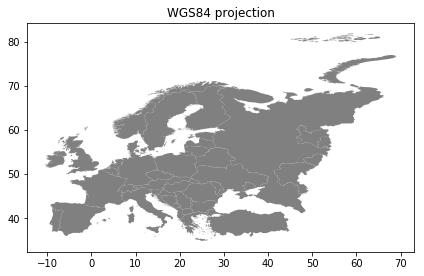

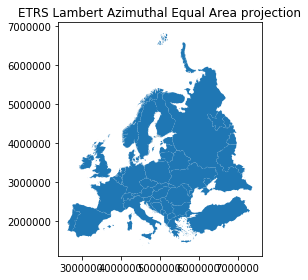

In [58]:
import matplotlib.pyplot as plt

data.plot(facecolor = 'gray');
plt.title ("WGS84 projection")
plt.tight_layout()

data_proj.plot();
plt.title("ETRS Lambert Azimuthal Equal Area projection");
plt.tight_layout()

In [59]:
outfp = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\Europe_borders\Europe_borders_epsg3035.shp"

data_proj.to_file (outfp)

# Расчет расстояний
Давайте продолжим работу с нашим Europe_borders.shpфайлом и узнаем евклидовы расстояния от центроидов европейских стран до Хельсинки, Финляндия. Мы рассчитаем расстояние между Хельсинки и другими европейскими странами (центроидами), используя метрическую проекцию (World Equidistant Cylindrical), которая дает нам расстояние в метрах.

Давайте сначала импортируем необходимые пакеты.

In [60]:
from shapely.geometry import Point
from fiona.crs import from_epsg

Далее нам нужно указать нашу проекцию на метрическую систему, используя World Equidistant Cylindrical -projection, где расстояния представлены правильно от центральной долготы и широты.

Давайте укажем наше целевое местоположение как координаты Хельсинки (lon = 24.9417 и lat = 60.1666).

In [61]:
hki_lon = 24.9417
hki_lat = 60.1666

Затем нам нужно указать строку Proj4 для перепрограммирования наших данных в World Equidistant Cylindrical, в которой мы хотим сосредоточить нашу проекцию на Хельсинки. Для этого нам нужно указать параметры +lat_0и +lon_0параметры в строке Proj4.

In [62]:
proj4_txt = '+proj=eqc +lat_ts=60 +lat_0=60.1666 +lon_0=24.9417 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

Okey, теперь мы готовы преобразовать наши Europe_borders.shpданные в желаемую проекцию. Давайте создадим новую копию нашего GeoDataFrame, которая называется data_d(d для «расстояния»).

In [63]:
data_d = data.to_crs (proj4_txt)

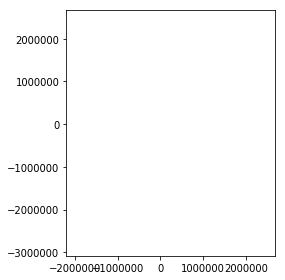

In [65]:
data_d.plot (facecolor = 'white');
plt.tight_layout();

Okey, отсюда мы видим, что на самом деле наша карта теперь сосредоточена в Хельсинки, поскольку 0-позиция в х и у находится на вершине Хельсинки.

Продолжим наш анализ, создав объект Point из Хельсинки и введем его в GeoPandas GeoSeries. Мы также указываем, что CRS GeoSeries - это WGS84. Вы можете сделать это, используя crsпараметр при создании GeoSeries.

In [67]:
hki = gpd.GeoSeries([Point(hki_lon, hki_lat)], crs=from_epsg(4326))

hki = hki.to_crs(proj4_txt)
print (hki)

0    POINT (0 0)
dtype: object


Ага! Таким образом, координаты Точки Хельсинки равны 0. Это подтверждает нам, что центром нашей проекции является действительно Хельсинки.

Затем нам нужно вычислить центроиды для всех полигонов европейских стран. Это можно сделать легко в Geopandas, используя centroidатрибут.

In [71]:
data_d['country_centroid'] = data_d.centroid
data_d.head()

,TZID,geometry,country_centroid
0,Europe/Berlin,POLYGON ((-917490.902938765 -623860.8457602418...,POINT (-917903.9422464954 -622642.5405510699)
1,Europe/Berlin,POLYGON ((-902900.1358645177 -1388149.17113167...,POINT (-904392.5030473378 -1387445.472292878)
2,Europe/Berlin,POLYGON ((-1013482.327822457 -733875.386620624...,POINT (-1013828.626127739 -731163.5049818818)
3,Europe/Berlin,POLYGON ((-1006521.780934238 -731645.973295638...,POINT (-1006121.183784871 -731061.5275938646)
4,Europe/Berlin,POLYGON ((-1004255.184179869 -728139.636948135...,POINT (-1004463.866293951 -726347.5551024198)


Okey, так что теперь у нас есть новый столбец country_centroidс геометриями точек, представляющими центроиды каждого многоугольника.

Теперь мы можем рассчитать расстояния между центроидами и Хельсинки. В конце урока 6 курса Geo-Python мы увидели пример, в котором мы использовали apply()функцию для выполнения цикла вместо использования iterrows()функции.

В (Geo) Pandas apply()функция использует numpy при циклировании и, следовательно, намного быстрее, что может принести много преимуществ скорости, когда у вас много строк для перебора. Здесь мы увидим, как мы можем использовать это для расчета расстояния между центроидами и Хельсинки. Мы создадим нашу собственную функцию для выполнения этого расчета.

Давайте сначала создадим нашу функцию calculateDistance().

In [73]:
def calculateDistance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
Вычисляет расстояние между одной геометрией Shapely Point и GeoDataFrame с геометриями точки. 

    Параметры 
    ---------- 
    dest_geom: shapely.Point 
        Единая геометрия Shapely Point, на которую рассчитываются расстояния. 
    src_col: str 
        Имя столбца, в котором есть объекты Shapely Point, из которых будут вычислены расстояния. 
    target_col: str
        Имя целевого столбца, в котором будет сохранен результат. 
    """ 
    # Вычислить расстояния 
    dist = row[src_col].distance(dest_geom)
    # Tranform into kilometers
    dist_km = dist/1000
    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

Строка параметров используется для передачи данных из каждой строки нашего GeoDataFrame в нашу функцию, а затем другие параметры используются для передачи другой необходимой информации для использования нашей функции.

Прежде чем использовать нашу функцию и вычислить расстояния между Хельсинки и центроидами, нам нужно получить геометрию Шапилы из перепроектированной центральной точки Хельсинки. Мы можем использовать get()функцию для извлечения значения из определенного индекса (здесь индекс 0).

In [74]:
hki_geom  =  hki . get ( 0 ) 
print (hki_geom)

POINT (0 0)


Теперь мы готовы использовать нашу функцию с apply()функцией. При использовании функции важно указать, что axis=1. Это указывает, что вычисления должны выполняться по строкам (вместо столбцов).

In [75]:
data_d = data_d.apply(calculateDistance, dest_geom=hki_geom, src_col='country_centroid', target_col='dist_to_Hki', axis=1)
data_d.head(20)

,TZID,geometry,country_centroid,dist_to_Hki
0,Europe/Berlin,POLYGON ((-917490.902938765 -623860.8457602418...,POINT (-917903.9422464954 -622642.5405510699),1109.157960
1,Europe/Berlin,POLYGON ((-902900.1358645177 -1388149.17113167...,POINT (-904392.5030473378 -1387445.472292878),1656.179561
2,Europe/Berlin,POLYGON ((-1013482.327822457 -733875.386620624...,POINT (-1013828.626127739 -731163.5049818818),1249.979421
3,Europe/Berlin,POLYGON ((-1006521.780934238 -731645.973295638...,POINT (-1006121.183784871 -731061.5275938646),1243.676322
4,Europe/Berlin,POLYGON ((-1004255.184179869 -728139.636948135...,POINT (-1004463.866293951 -726347.5551024198),1239.567840
5,Europe/Berlin,POLYGON ((-997180.2206149361 -722391.147770933...,POINT (-999775.4899468391 -722302.4737289525),1233.398514
6,Europe/Berlin,POLYGON ((-989533.173666431 -717672.4352247954...,POINT (-985175.7406942118 -717933.3742549553),1219.015820
7,Europe/Berlin,POLYGON ((-961035.3793522014 -713655.669388409...,POINT (-957746.955721946 -712083.932425452),1193.458319
8,Europe/Berlin,POLYGON ((-944257.0800747176 -711076.768984098...,POINT (-948110.4245212735 -710339.9995444618),1184.692488
9,Europe/Berlin,POLYGON ((-594066.0369506076 -719534.101513696...,POINT (-594503.8965858476 -719314.699591184),933.192649


In [76]:
max_dist = data_d['dist_to_Hki'].max()

mean_dist = data_d['dist_to_Hki'].mean()

print("Maximum distance to Helsinki is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))

Maximum distance to Helsinki is 3199 km, and the mean distance is 1185 km.
